1.5207068962600374
1.663198331480372


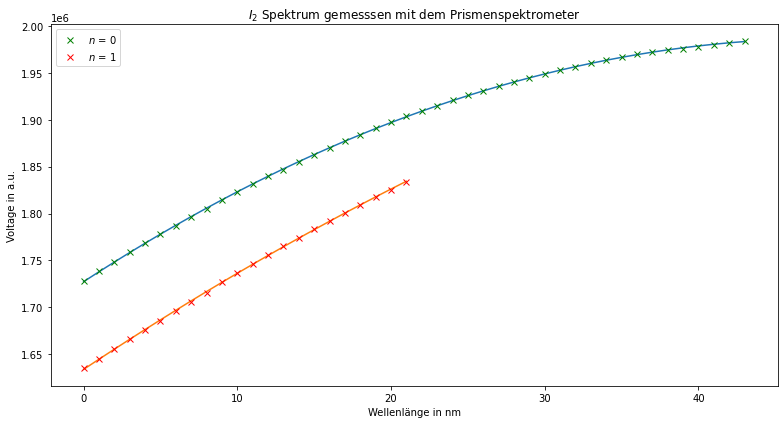

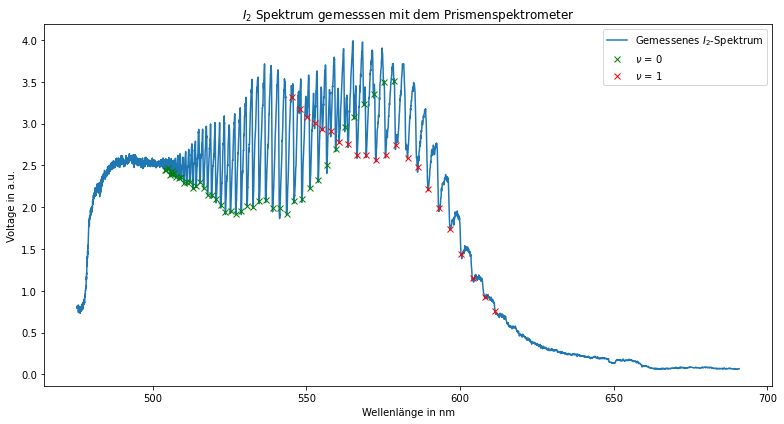

In [151]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks
from matplotlib.gridspec import GridSpec
## Parameter [7.05835870e-08 1.01924329e-03 4.75424576e+02]
class Banden:
    def __init__(self,path,data_correction_faktor=0):
        data = np.genfromtxt(path)
        self.step = []
        self.voltage = []
        for line in data:
            self.step.append(line[0])
            self.voltage.append(line[1])
        peak_list_first = [14130,14280,14480,14690,14860,14900,15100,15320,15560,15820,16080,16380,16660,16950,17290,17630,17970,18330,18680,19090,19500,19890,20320,20750,21220,21670,22140,22630,23130,23650,24190,24680,25210,25770,26320,26890,27470,28050,28630,29230,29830,30460,31050,31670]
        peak_list_sec = [25070,25590,26100,26640,27160,27720,28270,28850,29420,29980,30580,31170,31760,32460,33050,33650,34250,34860,35460,36070,36730,37260]
        for i in range(len(peak_list_first)):
            peak_list_first[i] -= data_correction_faktor
        for i in range(len(peak_list_sec)):
            peak_list_sec[i] -= data_correction_faktor
        self.manuel_peaks_first_bond = self.manuel(peak_list_first)
        self.manuel_peaks_second_bond = self.manuel(peak_list_sec)

    def steptowavelenght(self,step):
        step = np.array(step)
        return (7.05835870e-08*step**2 + 1.01924329e-03*step + 4.75424576e+02)

    def read_lampe(self,path):
        data = np.genfromtxt(path)
        step = []
        voltage= []
        for line in data:
            step.append(line[0])
            voltage.append(line[1])
        return step,voltage

    
    def manuel(self,peaks):
        peak_step =[]
        peak_voltage = []
        for peak in peaks:
            peak_step.append(self.step[int(peak/10)])
            peak_voltage.append(self.voltage[int(peak/10)])
        return peak_step,peak_voltage

    def plotwithpeaks(self):
        fig = plt.figure(figsize=(11, 6))
        gs = GridSpec(8, 5)
        fig1 = fig.add_subplot(gs[:, :])
        fig1.set_title(r"$I_2$ Spektrum gemesssen mit dem Prismenspektrometer")
        fig1.set_ylabel("Voltage in a.u.")
        fig1.set_xlabel("Wellenlänge in nm")
        #fig1.set_xlim(500,550)
        #fig1.set_xlim(20000,22000)
        fig1.plot(self.steptowavelenght(self.step),self.voltage,label=r"Gemessenes $I_2$-Spektrum")
        fig1.plot(self.steptowavelenght(self.manuel_peaks_first_bond[0]),self.manuel_peaks_first_bond[1],"gx",label=r"$\nu$ = 0")
        fig1.plot(self.steptowavelenght(self.manuel_peaks_second_bond[0]),self.manuel_peaks_second_bond[1],"rx",label=r"$\nu$ = 1")
        plt.tight_layout()
        plt.legend()
        plt.show()
    
    def diss_energy(self,parameters):
        h = 6.626e-34 #Planck constant [J*s]
        c = 299792458.0 #Speed of light in vacuum [m/s]
        eV = 6.242e18 #Joule to electron volt
        a = parameters[1]
        b = -parameters[0]
        v0 = parameters[2]
        nmax = a/(2*b)
        v = -b*nmax**2+a*nmax+v0
        return h*c*v*eV-0.943


    def err_ediss(self,parameters,errors):
        h = 6.626e-34 #Planck constant [J*s]
        c = 299792458.0 #Speed of light in vacuum [m/s]
        eV = 6.242e18 #Joule to electron volt
        a = parameters[1]
        b = -parameters[0]
        v0 = parameters[2]
        da = errors[1]
        db = errors[0]
        dv0 = errors[2]
        


    def plotbanden(self):
        fig = plt.figure(figsize=(11, 6))
        gs = GridSpec(8, 5)
        fig1 = fig.add_subplot(gs[:, :])
        fig1.set_title(r"$I_2$ Spektrum gemesssen mit dem Prismenspektrometer")
        fig1.set_ylabel("Voltage in a.u.")
        fig1.set_xlabel("Wellenlänge in nm")
        #fig1.set_xlim(550,600)
        #fig1.set_xlim(20000,22000)
        #fig1.plot(self.steptowavelenght(self.step),self.voltage,label=r"Gemessenes $I_2$-Spektrum")
        first_bond_new= np.array(list(reversed(list(self.steptowavelenght(self.manuel_peaks_first_bond[0])))))
        quantenzahl1 = np.array(list(range(len(first_bond_new))))
        second_bond_new= np.array(list(reversed(list(self.steptowavelenght(self.manuel_peaks_second_bond[0])))))
        quantenzahl2 = np.array(list(range(len(second_bond_new))))
        fit1,err1 = np.polyfit(quantenzahl1,1/(first_bond_new*1e-9),2,cov=True)
        fit2,err2 = np.polyfit(quantenzahl2,1/(second_bond_new*1e-9),2,cov=True)    
        print(self.diss_energy(fit1))
        print(self.diss_energy(fit2))
        #print(self.test_diss(fit1,fit2))
        fig1.plot(quantenzahl1,fit1[0]*quantenzahl1**2+fit1[1]*quantenzahl1+fit1[2])
        fig1.plot(quantenzahl2,fit2[0]*quantenzahl2**2+fit2[1]*quantenzahl2+fit2[2])
        fig1.plot(1/(first_bond_new*1e-9),"gx",label=r"$n$ = 0")
        fig1.plot(1/(second_bond_new*1e-9),"rx",label=r"$n$ = 1")
        plt.tight_layout()
        plt.legend()
        plt.show()



manuel_peaks_first_bond = [14130,14280,14480,14690,14860,14900,15100,15320,15560,15820,16080,16380,16660,16950,17290,17630,17970,18330,18680,19090,19500,19890,20320,21220,21670,22140,22630,23130,23650,24190,24680,25210,25770,26320,26890,27470,28050,28630,29230,29830,30460,31050,31670,32370]
manuel_peaks_second_bond = [25070,25590,26100,26640,27160,27720,28270,28850,29420,29980,30580,31170,31760,32460,33050,33650,34250,34860,35460,36070,36730,37260]


bande = Banden('./data/Iod_absorb/1_-4_ohneLinse.dat', data_correction_faktor=0)
bande.plotbanden()
#print(bande.diss_energy2([-24,6.87e3,1.4e6]))
#print(bande.diss_energy1([-29.5,0.95e4,1.7e6]))
bande.plotwithpeaks()